In [1]:
from train import train_dqn
from utils import rollout_dqn
from vis import plot_training_rewards, plot_rollout_histogram, plot_max_q_values
from utils import preprocess_observation
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
import numpy as np
import ale_py

device = torch.device("cuda:3")
print(f"Currently using device: {device}")

Currently using device: cuda:3


### Part 1: Train Deep Q Network on CartPole environment

Training

In [2]:
env = gym.make("ALE/MsPacman-v5")

obs_shape = (88, 80)
obs_dim = obs_shape[0] * obs_shape[1]
act_dim = env.action_space.n

def preprocess_obs(obs):
    frame = preprocess_observation(obs)
    return torch.as_tensor(frame.flatten(), dtype=torch.float32, device=device)

obs, _ = env.reset()
frame = preprocess_observation(obs)
print("Preprocessed shape:", frame.shape, "| Flattened:", frame.flatten().shape)


trained_q_network, training_rewards, training_max_q_values = train_dqn(
    env=env,
    device=device,
    obs_dim=obs_dim,
    act_dim=act_dim,
    preprocess_obs=preprocess_obs,
    gamma=0.99,
    lr=1e-4,
    epsilon_start=1.0,
    epsilon_end=0.01,
    epsilon_decay=250000,
    batch_size=32,
    buffer_size=200000,
    min_buffer=20000,
    target_update_freq=1000,
    training_episodes=6000,
    hidden_dim=512,
    use_epsilon_scheduler=True,   
    use_huber_loss=True
)

A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


Preprocessed shape: (88, 80, 1) | Flattened: (7040,)


Episode    0 | Reward:  240.0 | ε=1.00


Episode  100 | Reward:  150.0 | ε=0.81


Episode  200 | Reward:  220.0 | ε=0.67


Episode  300 | Reward:  400.0 | ε=0.55


Episode  400 | Reward: 1180.0 | ε=0.44


Episode  500 | Reward:  420.0 | ε=0.36


Episode  600 | Reward:  190.0 | ε=0.29


Episode  700 | Reward:  420.0 | ε=0.24


Episode  800 | Reward:  400.0 | ε=0.19


Episode  900 | Reward: 2090.0 | ε=0.15


Episode 1000 | Reward:  510.0 | ε=0.12


Episode 1100 | Reward:  970.0 | ε=0.10


Episode 1200 | Reward:  510.0 | ε=0.08


Episode 1300 | Reward:  400.0 | ε=0.07


Episode 1400 | Reward: 1450.0 | ε=0.06


Episode 1500 | Reward:  390.0 | ε=0.05


Episode 1600 | Reward:  730.0 | ε=0.04


Episode 1700 | Reward:  670.0 | ε=0.03


Episode 1800 | Reward:  780.0 | ε=0.03


Episode 1900 | Reward:  290.0 | ε=0.02


Episode 2000 | Reward:  450.0 | ε=0.02


Episode 2100 | Reward:  270.0 | ε=0.02


Episode 2200 | Reward:  710.0 | ε=0.02


Episode 2300 | Reward:  380.0 | ε=0.02


Episode 2400 | Reward:  580.0 | ε=0.01


Episode 2500 | Reward:  290.0 | ε=0.01


Episode 2600 | Reward:  360.0 | ε=0.01


Episode 2700 | Reward:  320.0 | ε=0.01


Episode 2800 | Reward:  220.0 | ε=0.01


Episode 2900 | Reward:  300.0 | ε=0.01


Episode 3000 | Reward:  470.0 | ε=0.01


Episode 3100 | Reward:  370.0 | ε=0.01


Episode 3200 | Reward:  190.0 | ε=0.01


Episode 3300 | Reward: 1160.0 | ε=0.01


Episode 3400 | Reward:  480.0 | ε=0.01


Episode 3500 | Reward:  310.0 | ε=0.01


Episode 3600 | Reward:  420.0 | ε=0.01


Episode 3700 | Reward:  950.0 | ε=0.01


Episode 3800 | Reward:  470.0 | ε=0.01


Episode 3900 | Reward: 1490.0 | ε=0.01


Episode 4000 | Reward:  340.0 | ε=0.01


Episode 4100 | Reward: 2230.0 | ε=0.01


Episode 4200 | Reward: 1000.0 | ε=0.01


Episode 4300 | Reward:  830.0 | ε=0.01


Episode 4400 | Reward:  820.0 | ε=0.01


Episode 4500 | Reward:  790.0 | ε=0.01


Episode 4600 | Reward:  780.0 | ε=0.01


Episode 4700 | Reward:  210.0 | ε=0.01


Episode 4800 | Reward:  750.0 | ε=0.01


Episode 4900 | Reward:  150.0 | ε=0.01


Episode 5000 | Reward: 1190.0 | ε=0.01


Episode 5100 | Reward:  960.0 | ε=0.01


Episode 5200 | Reward:  910.0 | ε=0.01


Episode 5300 | Reward: 1040.0 | ε=0.01


Episode 5400 | Reward:  750.0 | ε=0.01


Episode 5500 | Reward: 2050.0 | ε=0.01


Episode 5600 | Reward:  920.0 | ε=0.01


Episode 5700 | Reward: 1010.0 | ε=0.01


Episode 5800 | Reward:  960.0 | ε=0.01


Episode 5900 | Reward:  910.0 | ε=0.01


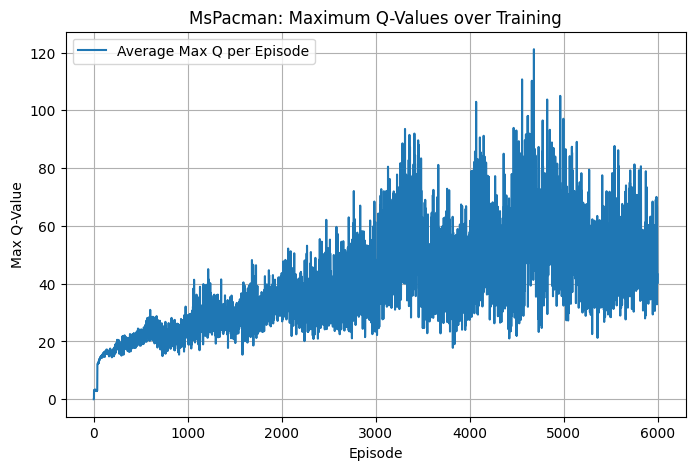

In [3]:
plot_max_q_values(game_name="MsPacman", max_q_values=training_max_q_values)

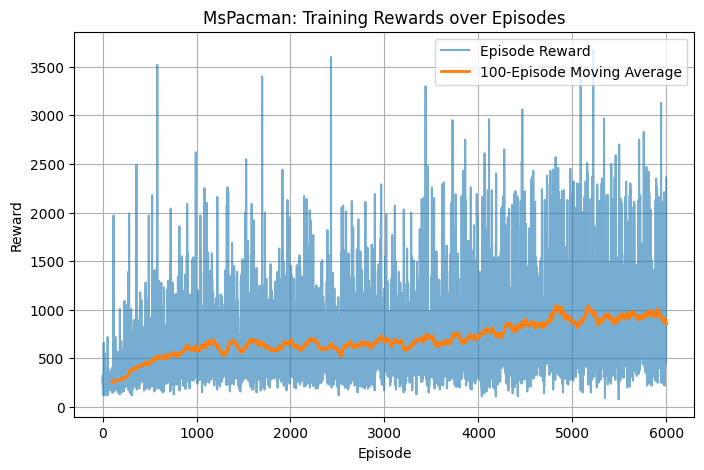

In [4]:
plot_training_rewards(game_name="MsPacman", rewards=training_rewards)

In [5]:
rollout_rewards = rollout_dqn(env, q_network=trained_q_network, device=device, episodes=500,
                              preprocess_obs=preprocess_obs)

Episode    0 | Return: 590.0


Episode   50 | Return: 1260.0


Episode  100 | Return: 1280.0


Episode  150 | Return: 850.0


Episode  200 | Return: 590.0


Episode  250 | Return: 1340.0


Episode  300 | Return: 1230.0


Episode  350 | Return: 590.0


Episode  400 | Return: 590.0


Episode  450 | Return: 600.0


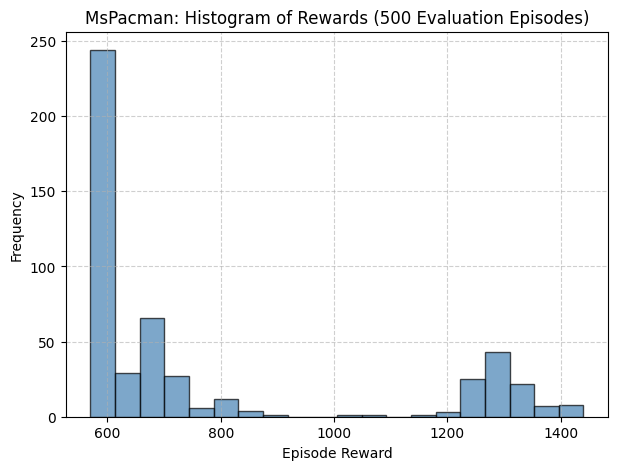

MsPacman: Mean reward over 500 episodes: 776.22
MsPacman: Std. dev. of reward: 282.86


In [6]:
plot_rollout_histogram(game_name="MsPacman", rewards=rollout_rewards)